In [1]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import hashlib
import numpy as np

# Exploring SVD: A Hands-on Image Processing Exercise

<h3>Introduction</h3>

This notebook guides you through exploring Singular Value Decomposition (SVD) through image processing. This is an ungraded, self-learning exercise to help you understand how SVD works and its applications.

The following cell will generate a unique image based on your ID. Feel free to modify the ID to create different test images.


In [4]:

# Enter your Unique ID as variable unique_id
unique_id = 20251999
id_number = str(unique_id)

# Image size
image_size = 256

# Create a blank color image
image = Image.new("RGB", (image_size, image_size), (255, 255, 255))
draw = ImageDraw.Draw(image)

# Calculate the hash value based on the ID
hash_value = hashlib.md5(id_number.encode()).hexdigest()

# Extract the RGB values from the hash value
red = int(hash_value[:2], 16)
green = int(hash_value[2:4], 16)
blue = int(hash_value[4:6], 16)

# Create a gradient background
gradient = np.tile(np.linspace(0, 255, image_size), (image_size, 1)).astype(np.uint8)
gradient_image = Image.fromarray(gradient, mode="L").convert("RGB")

# Overlay the gradient background on the image
image.paste(gradient_image, (0, 0))

# Define the rectangle parameters
rectangle_width = image_size // 2
rectangle_height = image_size // 4

# Define the font size based on the image size
font_size = min(rectangle_width, rectangle_height) // 2

# Choose a font (you may need to provide the font file path)
font = ImageFont.truetype(r"C:\Users\shaya\Downloads\Week 3 SVD Assignment\Conquest-8MxyM.ttf", font_size)

top_left = ((image_size - rectangle_width) // 2, (image_size - rectangle_height) // 2)
bottom_right = (top_left[0] + rectangle_width, top_left[1] + rectangle_height)

# Draw a filled rectangle on the image
draw.rectangle([top_left, bottom_right], fill=(255 - red, 255 - green, 255 - blue))

# Calculate the text position
text_bbox = draw.textbbox((0, 0), id_number, font=font)
# Extract width and height from the bounding box
text_width = text_bbox[2] - text_bbox[0]
text_height = text_bbox[3] - text_bbox[1]

text_position = ((image_size - text_width) // 2, (image_size - text_height) // 2)

# Draw the text on the image with the calculated RGB values
draw.text(text_position, id_number, fill=(red, green, blue), font=font)

# convert the pil image to np array so that we can deal the image with pyplot library.
img = np.array(image)

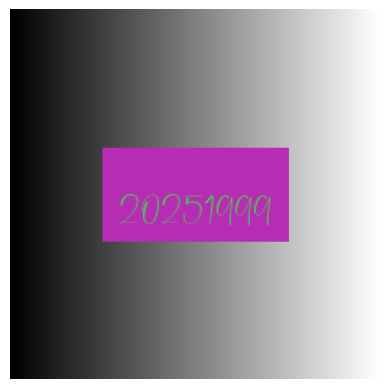

In [5]:
# Plot the image
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

# Understanding Singular Value Decomposition (SVD)

SVD is a powerful technique in linear algebra that factorizes a matrix into three other matrices. In image processing, SVD can be used for:
- Data compression
- Noise reduction
- Feature extraction
- Image reconstruction

In this assignment, you will explore how SVD works with images through a series of guided exercises.

## Mathematical Background
For a matrix $A$, SVD decomposes it as:
$A = U \Sigma V^T$

Where:
- $U$ is an orthogonal matrix containing the left singular vectors
- $\Sigma$ is a diagonal matrix containing the singular values in descending order
- $V^T$ is the transpose of an orthogonal matrix containing the right singular vectors

The singular values represent the importance of each component. For image compression, we can keep only the largest singular values to reduce the data size while maintaining the essential features of the image.

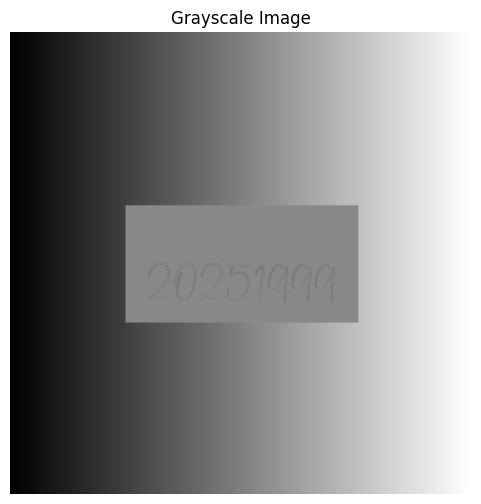

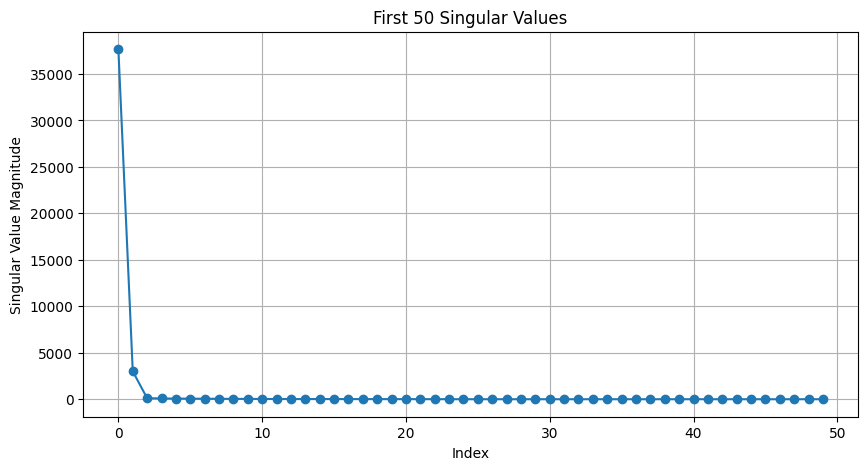

Energy preserved with different numbers of components:
- 5 components: 100.00%
- 10 components: 100.00%
- 20 components: 100.00%
- 30 components: 100.00%
- 50 components: 100.00%
- 100 components: 100.00%


In [6]:
# Part 1: Convert the image to grayscale by taking the average of the R, G, B pixel values
# YOUR CODE HERE
gray_img = np.mean(img, axis=2)

# Display the grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Part 2: Perform Singular Value Decomposition (SVD) on the grayscale image
# YOUR CODE HERE
U, sigma, Vt = np.linalg.svd(gray_img, full_matrices=False)

# Part 3: Analyze the singular values
plt.figure(figsize=(10, 5))
plt.plot(sigma[:50], 'o-')
plt.title('First 50 Singular Values')
plt.xlabel('Index')
plt.ylabel('Singular Value Magnitude')
plt.grid(True)
plt.show()

# Part 4: Calculate energy percentage preserved in the first k singular values
energy_total = np.sum(sigma**2)
energy_percentages = [np.sum(sigma[:k]**2) / energy_total * 100 for k in [5, 10, 20, 30, 50, 100]]

print("Energy preserved with different numbers of components:")
for k, percentage in zip([5, 10, 20, 30, 50, 100], energy_percentages):
    print(f"- {k} components: {percentage:.2f}%")

# Image Reconstruction Experiments

Now let's experiment with image reconstruction using different numbers of singular values. We'll see how the quality changes as we use more components.

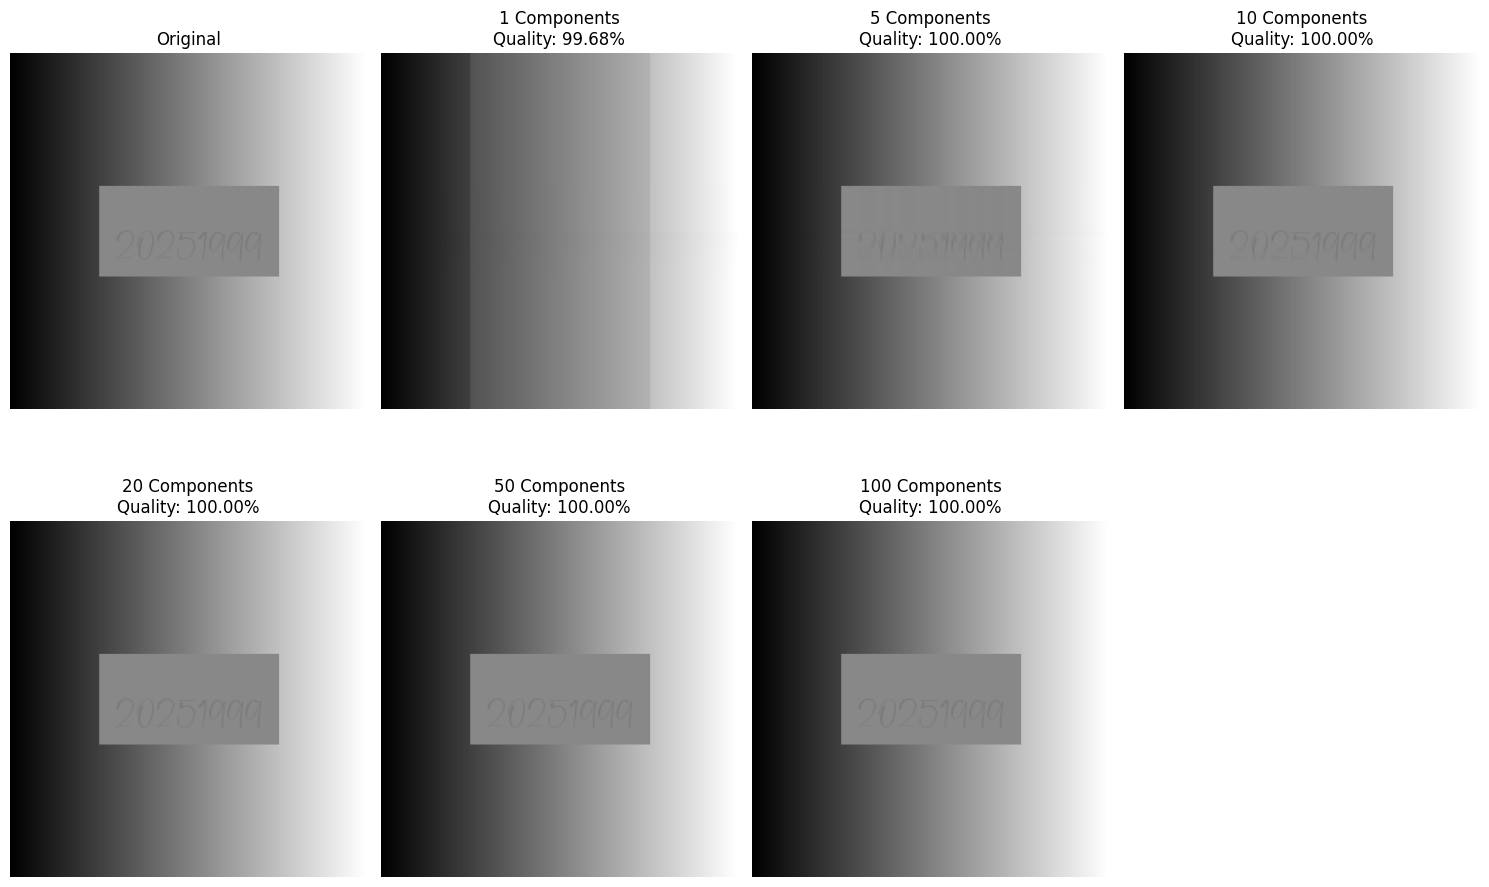

In [7]:
def reconstruct_image(U, sigma, Vt, k):
    """
    Reconstruct an image using first k singular values and vectors
    """
    # Create a reconstructed image using only k components
    reconstructed = U[:, :k] @ np.diag(sigma[:k]) @ Vt[:k, :]
    
    # Calculate reconstruction quality percentage
    quality = (np.linalg.norm(reconstructed) / np.linalg.norm(gray_img)) * 100
    
    return reconstructed, quality

# Define different component counts to try
component_counts = [1, 5, 10, 20, 50, 100]

# Create a plot with multiple reconstructions
plt.figure(figsize=(15, 10))

# Add the original grayscale image
plt.subplot(2, 4, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original')
plt.axis('off')

# Show reconstructions with different numbers of components
for i, k in enumerate(component_counts):
    # Reconstruct the image
    reconstructed, quality = reconstruct_image(U, sigma, Vt, k)
    
    # Display the reconstructed image
    plt.subplot(2, 4, i+2)
    plt.imshow(reconstructed, cmap='gray')
    plt.title(f'{k} Components\nQuality: {quality:.2f}%')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Task: Analyze Compression Efficiency

Let's analyze the compression efficiency of SVD by comparing the storage requirements of the original grayscale image versus the reconstructed images using different numbers of components.

For a grayscale image of size m×n:
- Original storage: m×n values
- SVD storage: k(m+n+1) values (k components from U, Σ, and V)

Complete the next cell to calculate the compression ratios for different values of k.

In [8]:
# Calculate and compare storage requirements
m, n = gray_img.shape
original_size = m * n

print(f"Original grayscale image size: {m}×{n} = {original_size} values")
print("\nCompression analysis:")
print(f"{'Components':<10} {'SVD Size':<10} {'Compression Ratio':<20} {'Quality (%)':<12}")
print("-" * 60)

for k in [1, 5, 10, 20, 50, 100]:
    # Calculate SVD storage (k components from U, Sigma, and V)
    svd_size = k * (m + n + 1)
    
    # Calculate compression ratio
    compression_ratio = original_size / svd_size
    
    # Calculate reconstruction quality
    _, quality = reconstruct_image(U, sigma, Vt, k)
    
    # Print results
    print(f"{k:<10} {svd_size:<10} {compression_ratio:.2f}x{' '*13} {quality:.2f}%")

Original grayscale image size: 256×256 = 65536 values

Compression analysis:
Components SVD Size   Compression Ratio    Quality (%) 
------------------------------------------------------------
1          513        127.75x              99.68%
5          2565       25.55x              100.00%
10         5130       12.78x              100.00%
20         10260      6.39x              100.00%
50         25650      2.56x              100.00%
100        51300      1.28x              100.00%


# Bonus: Verifying Your Understanding

To verify your understanding of SVD concepts, run the cell below. This will check if you've correctly implemented the core SVD operations and provide feedback.

In [9]:
def verify_svd_understanding():
    """Function to verify your understanding of SVD concepts"""
    # Check if gray_img exists
    try:
        _ = gray_img
        print("✓ Grayscale conversion completed")
    except NameError:
        print("✗ Grayscale image not found. Make sure you've converted the RGB image to grayscale.")
        return
    
    # Check if SVD was performed
    try:
        _ = U, sigma, Vt
        print("✓ SVD components found")
    except NameError:
        print("✗ SVD components not found. Make sure you've performed SVD on the grayscale image.")
        return
        
    # Check if shapes make sense
    if U.shape[0] == gray_img.shape[0] and Vt.shape[1] == gray_img.shape[1]:
        print("✓ SVD dimensions are correct")
    else:
        print(f"✗ SVD dimensions mismatch. Expected U.shape[0]={gray_img.shape[0]} and Vt.shape[1]={gray_img.shape[1]}")
        return
        
    # Try reconstruction with 10 components
    try:
        reconstructed_10 = U[:, :10] @ np.diag(sigma[:10]) @ Vt[:10, :]
        mse = np.mean((gray_img - reconstructed_10) ** 2)
        print(f"✓ Successfully reconstructed image with 10 components")
        print(f"  Mean Squared Error: {mse:.2f}")
        
        # Calculate energy retention
        energy_retained = np.sum(sigma[:10]**2) / np.sum(sigma**2) * 100
        print(f"  Energy retained: {energy_retained:.2f}%")
        
        if energy_retained > 80:
            print("  Great job! You've retained most of the image energy with just 10 components.")
        else:
            print("  Hmm, the energy retention seems low. Check your SVD implementation.")
    except:
        print("✗ Error in image reconstruction. Check your implementation.")
        
    print("\nKeep exploring SVD and its applications!")

# Run the verification
verify_svd_understanding()

✓ Grayscale conversion completed
✓ SVD components found
✓ SVD dimensions are correct
✓ Successfully reconstructed image with 10 components
  Mean Squared Error: 0.06
  Energy retained: 100.00%
  Great job! You've retained most of the image energy with just 10 components.

Keep exploring SVD and its applications!


# Learning Outcomes & Next Steps

This is an ungraded, educational exercise to help you understand Singular Value Decomposition and its applications to image processing.

As you work through this notebook:
1. Focus on understanding the concepts rather than "getting it right"
2. Experiment with different parameters and approaches
3. Take notes on questions or insights you have

A solution notebook will be provided in a few days so you can compare your implementation with a reference solution.

## Key takeaways:
- How SVD decomposes images into components of decreasing importance
- The trade-off between compression ratio and image quality
- Practical applications of SVD beyond basic compression

Enjoy exploring these fascinating concepts in linear algebra and image processing!